<img src="idal-logo.png" align="right" style="float" width="400">
<font color="#CA3532"><h1 align="left">mIA3</h1></font>
<font color="#6E6E6E"><h2 align="left"><b>Tarea Evaluable. Aprendizaje por refuerzo.</b></h2></font> 

#### Elaborado por Felipe Ramírez Herrera

Objetivo principal:
Intentar resolver un problema de la librería de environments gym (que no sea el CartPole).

Material a presentar:
- Jupyter notebook con la implementación (a ser posible sin bugs)
- Breve memoria del problema (de 1 a 3 hojas aprox.). 
- La memoria puede estar integrada en el notebook.

Puntuación:
40% Implementación
30% Razonamiento de la resolución del problema
20% Presentación de resultados
10% Aporte extra

Comentarios:
- Se puede usar cualquier algoritmo de RL que consideréis que se adecúa al problema (no tiene por qué ser deep RL).
- Se puede escoger cualquier environment de la librería gym. Pero cuidado con los environments complejos que tardan más en resolverse.
- El problema no tiene por qué resolverse con éxito (obtener la recompensa promedio esperada), se trata de intentarlo y hacer un razonamiento crítico de qué ha sucedido en el intento, explicando lo que ha ido bien y lo que ha ido mal.
- Como implementación se puede usar cualquier librería de RL que se prefiera, incluido el código visto en clase.

Aspectos a valorar:
- Análisis del problema (environment) a resolver. Características del environment: Tipos de estados, acciones y recompensas. ¿Cuál es la recompensa promedio por episodio que se espera conseguir?
- Argumentación de la elección del algoritmo y los pasos realizados durante el entrenamiento. Políticas de exploración utilizadas (si se usan)
- En la presentación de resultados, se valorará observar la evolución del aprendizaje del agente (recompensa por episodio u otras métricas que se consideren).


### Problema

Este proyecto implementa el **LunarLander-v2** de OpenAI's Gym con PyTorch. Se procura resolver tanto la versión discreta como la continua del ambiente.

### Objetivo

El objetivo es aterrizar la nave de manera segura en la plataforma de aterrizaje utilizando técnicas del aprendizaje por refuerzo. El ambiente se fundamenta en las siguiente premisas:

* La plataforma de aterrizaje siempre se encuentra en las coordenadas (0,0). 

* Las coordenadas son los dos primeros números en el vector de estado. 

* La recompensa por moverse desde la parte superior de la pantalla hasta la plataforma de aterrizaje y tener velocidad cero es de aproximadamente 100 a 140 puntos. 

* Si la nave se aleja de la plataforma de aterrizaje, pierde puntos de recompensa. 

* El episodio finaliza si la nave se estrella o se detiene, recibiendo -100 o +100 puntos adicionales respectivamente. 

* Cada contacto de la pata con el suelo suma +10 puntos. 

* Encender el motor principal resta -0.3 puntos en cada fotograma. 

* Se considera resuelto cuando se alcanzan los 200 puntos. Es posible aterrizar fuera de la plataforma de aterrizaje. 

* El combustible es infinito, por lo que un agente puede aprender a volar y luego aterrizar en su primer intento. Hay cuatro acciones discretas disponibles: no hacer nada, encender el motor de orientación izquierdo, encender el motor principal, encender el motor de orientación derecho.*

En Open GYM Lunar Lander V2, las condiciones de finalización o "Episode Termination" se refieren a las situaciones que finalizan un intento de aterrizaje en el juego:

* Choque del vehículo: Cuando el cuerpo del vehículo entra en contacto con la superficie lunar, se considera que ha ocurrido un choque, lo que pone fin al episodio.

* Salida del vehículo del área visible: Si la posición x del vehículo supera el valor de 1, indica que el vehículo ha salido de los límites de la pantalla o del área de juego, lo que termina el episodio.

* Vehículo no despierto (awake): Un vehículo que no está "despierto" no se mueve ni colisiona con otros cuerpos en la simulación. Si el vehículo queda en un estado de inmovilidad sin interacciones, se termina el episodio.

Estas condiciones clarifican cuándo un intento de aterrizaje en Open GYM Lunar Lander V2 se da por concluido, estableciendo criterios precisos para evaluar cada sesión de juego.

### Estado

Los "estados" se refieren a las condiciones o variables que describen completamente la situación actual del juego en un momento dado. Estos estados son fundamentales porque determinan cómo se comporta el entorno y cómo interactúan los agentes (en este caso, el aterrizador lunar y la gravedad).

* s[0] es la coordenada horizontal
* s[1] es la coordenada vertical
* s[2] es la velocidad horizontal
* s[3] es la velocidad vertical
* s[4] es el ángulo
* s[5] es la velocidad angular
* s[6] 1 si la primera pata tiene contacto, sino 0
* s[7] 1 si la segunda pata tiene contacto, sino 0

Los estados son cruciales porque permiten al agente (o jugador) tomar decisiones informadas sobre qué acciones realizar a continuación. En el contexto de aprendizaje por refuerzo, por ejemplo, el agente utiliza estos estados para seleccionar acciones que maximicen una recompensa esperada, como aterrizar de manera segura en el caso de Open GYM Lunar Lander V2, evitando así condiciones que podrían terminar el episodio prematuramente, como un choque o salirse de la pantalla.

### Acciones

En un entorno discreto, las "acciones" se refieren a las decisiones que un agente puede tomar en un momento dado, las cuales están limitadas a un conjunto específico y finito de opciones bien definidas. En el contexto de Open GYM Lunar Lander V2 u otros entornos de simulación similares, las acciones discretas se utilizan para controlar cómo interactúa el agente con el entorno.Hay cuatro acciones discretas disponibles:

* 0: no hacer nada
* 1: encender motor de orientación izquierdo
* 2: encender motor principal
* 3: encender motor de orientación derecho

Estas acciones discretas están diseñadas específicamente para manejar las limitaciones de procesamiento y toma de decisiones en entornos donde las opciones son limitadas y no se permite un rango continuo de movimientos o comportamientos. Cada acción discreta seleccionada afecta el estado del juego, moviendo al agente (en este caso, el aterrizador lunar) hacia diferentes resultados potenciales, como un aterrizaje exitoso, un choque o la finalización prematura del episodio debido a salir de los límites de la pantalla o a un estado inactivo del aterrizador.

En contraste con un entorno discreto, en un entorno continuo las "acciones" son decisiones que un agente puede tomar y que pueden tomar un valor dentro de un rango continuo o infinito de posibilidades. Esto implica que las acciones no están limitadas a un conjunto predefinido y discreto, sino que pueden variar suavemente en una escala continua (-1, +1).

En el modo continuo, el entorno permite un control más fino con dos valores continuos:

* Fuerza de empuje principal (hacia abajo)
* Fuerza de empuje lateral (izquierda o derecha)

Las acciones continuas permiten una mayor flexibilidad y precisión en cómo el agente interactúa con el entorno. Esto es especialmente útil en situaciones donde los movimientos deben ser suaves y precisos, como el aterrizaje controlado de un vehículo en la superficie lunar. El agente puede ajustar sus acciones de manera gradual para lograr objetivos específicos, como evitar colisiones, mantener una trayectoria estable o optimizar el uso de recursos como el combustible.

### Recompensa promedio

Como se menciono el entorno LunarLander-v2 puede utilizarse en dos modos: discreto y continuo. La recompensa promedio para estos dos modos puede variar dependiendo de varios factores como la estrategia de control utilizada, el algoritmo de aprendizaje implementado, y el tiempo de entrenamiento.

#### **Entorno discreto**

* La recompensa objetivo en el modo discreto es alrededor de 200 puntos. Esto significa que si una política alcanza o supera este valor en promedio, se considera que ha aprendido a resolver el entorno.
* En un entorno entrenado adecuadamente, una política puede esperar obtener recompensas promedio en el rango de 200 a 250 puntos.

#### **Entorno continuo**
* En el modo continuo, la recompensa objetivo también está en el rango de 200 puntos.
* Las políticas bien entrenadas pueden obtener recompensas promedio similares, generalmente entre 200 y 250 puntos.


#### **Factores que Influyen en la Recompensa**

* Algoritmo de Aprendizaje: Algoritmos como DQN, DDPG, TD3 y SAC pueden obtener diferentes resultados.
* Tiempo de Entrenamiento: Mayor tiempo de entrenamiento suele resultar en mejores recompensas promedio.
* Ajuste de Hiperparámetros: Ajustes como la tasa de aprendizaje, el tamaño del lote, y otros parámetros pueden afectar significativamente la recompensa promedio.


### Selección del algoritmo

Con el fin de entender las mejoras propuestas en los algoritmos basados en arquitecturas Q Learning y Actor-Critic, se decide resolver el problema utilizando los siguientes algoritmos:

* Deep Q Learning (DQN)
* Double Deep Q-Network (DDQN)
* Twin Delayed Deep Deterministic Policy Gradients (TD3)
* Soft Actor-Critic (SAC)
* Deep Deterministic Policy Gradients (DDPG)

En los cuatro algoritmos se realiza su adaptación al problema y se procura resolverlo. A continuación se muestra la estrategia de resolución que se tomó para representar el problema y organizar el código fuente que se incluye junto con este cuaderno:

* **rl_lunar_lander.ipynb**: Este cuaderno. 
* **rl_lunar_lander_constants.py**: Contiene constantes importantes, como nomenclaturas de archivos y constantes globales (p. ej. n_episodes).
* **rl_lunar_lander_generic.py**: Contiene la definición de la clase base "Agent" y las rutinas de entrenamiento.
* **rl_lunar_lander_ERM.py**: Contiene la implementación del buffer de experiencias.
* **rl_lunar_lander_Q.py**: Contiene la implementación de DQN y DDQN.
* **rl_lunar_lander_DDPG.py**: Contiene la implementación DDPG.
* **rl_lunar_lander_TD3.py**: Contiene la implementación de TD3.
* **rl_lunar_lander_SAC.py**: Contiene la implementación de SAC.



Es importante mencionar que como parte de la estrategia de resolución se encapsuló la funcionalidad de los algoritmos de forma homogénea (a manera de biblioteca), con el fin de solo implementar una rutina de entramiento, evaluación y presentación de los resultados, así como también, aislar los algoritmos para su estudio detallado y reutilización posterior.

Para implementar algoritmos que resuelvan el problema del Lunar Lander utilizando patrones de diseño orientados a objetos, es importante considerar una estructura modular y flexible que permita representar adecuadamente tanto el entorno como el agente (el Lunar Lander). El patrón Model View-Controller (MVC) es útil para separar la lógica de negocio (modelo), la presentación y visualización (vista) y la gestión de interacciones y control (controlador).

Para aplicar el patrón Model View-Controller (MVC) por ejemplo a algoritmos tipo "Actor-Critic" (p. ej. DDPG, SAC, TD3) para resolver el problema del Lunar Lander, se estructuró la implementación de la siguiente manera:

##### **Modelo (Model)**

El modelo se refiere a la red neuronal que representa tanto el actor como el crítico en el método de aprendizaje por refuerzo. Aquí, tenemos dos redes neuronales para el crítico (Q-networks) y una para el actor (policy network).

* Q-networks (Crítico): Estas redes estiman el valor Q del estado y acción dados. 
* Policy Network (Actor): Esta red determina la política (las acciones) que el agente tomará en función del estado actual. 

##### **Vista (View)**

En el contexto de un entorno de simulación como OpenAI Gym para Lunar Lander, la "vista" no se refiere a una interfaz gráfica como típicamente se entiende en MVC, sino más bien a la representación del entorno y la interacción con él.

* Entorno (Environment): En este caso, el entorno es la "vista". Proporciona el estado actual del Lunar Lander, como su posición, velocidad, ángulo de orientación, etc. Además, el entorno ofrece métodos para realizar acciones (impulsar el aterrizador, rotarlo, etc.), y para recibir retroalimentación del entorno, como recompensas y observaciones del próximo estado.
Controlador (Controller) El controlador en TD3 actúa como el intermediario entre el modelo (redes neuronales) y la vista (entorno). Se encarga de manejar la lógica de entrenamiento y toma de decisiones basada en las predicciones del modelo y las interacciones con el entorno.

* Agente (Agent): El controlador sería representado por el agente de aprendizaje por refuerzo, todos los agentes propuestos heredan e implementan la funcionalidad propuesta para **"Agent"** que se encuentra en el archivo **rl_lunar_lander_generic.py**. Este agente utiliza las redes neuronales (Q-networks y policy network) para decidir qué acción tomar en función del estado actual del entorno. El agente también gestiona la recolección de muestras de experiencia (experience replay buffer), el proceso de entrenamiento de las redes neuronales y la exploración del espacio de acciones (véase rl_lunar_lander_ERM.py).

##### **Interacción entre Componentes**

El entorno (Environment) proporciona el estado actual y permite al agente (Agent) realizar acciones como impulsar el aterrizador.

El agente (Agent) utiliza las redes neuronales (Q-networks y policy network) para predecir valores Q y seleccionar acciones, que luego se aplican al entorno.

Durante el entrenamiento, el agente recopila muestras de experiencia (estado, acción, recompensa, próximo estado) en un replay buffer, desde donde se muestrean lotes para el entrenamiento de las redes neuronales.

Este enfoque estructurado y modular ayuda a mantener una separación clara de responsabilidades entre los componentes del sistema, facilitando la implementación y depuración del algoritmo para resolver el problema del Lunar Lander utilizando el patrón Modelo-Vista-Controlador.

De esta forma, los componentes interactúan de la siguiente manera:

<img src="Lunar_Lander_V2.svg" align="Center" style="float" width="70%">

Fuente: Elaboración propia del alumno

Siguiendo el diagrama anterior, inicialmente, el ambiente se encuentra en un estado inicial que se genera mediante un primer observación del entorno **(A)**. En cada paso de tiempo, el agente puede observar el entorno y tomar una acción **(B)**. Después de tomar una acción, el entorno cambia **(C)** y el agente puede observar el nuevo estado del entorno **(D)**. En cada transición de un estado a otro, el agente recibe retroalimentación en forma de una recompensa o una penalización **(D)** y se procede con la actualización y optimización de los gradientes **(E)**.

Para resolver el problema se propone un X_Agent (en este caso hay un DQN_Agent, DDQN_Agent, DDPG_Agent TD3_Agent y SAC_Agent) para resolver el problema de Lunar-Lander V2 con diferentes algoritmos y medir su desempeño.



In [1]:
import os
import torch
import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [3]:
import rl_lunar_lander_constants as constants

from rl_lunar_lander_constants import DEFAULT_EVAL_EPISODES
from rl_lunar_lander_generic import Agent
from rl_lunar_lander_generic import run_agent_learning_cycle
from rl_lunar_lander_generic import get_enviroment_details
from rl_lunar_lander_generic import live_model_demostration
from rl_lunar_lander_generic import generate_MP4
from rl_lunar_lander_Q import XQN
from rl_lunar_lander_Q import Method
from rl_lunar_lander_TD3 import TD3
from rl_lunar_lander_DDPG import DDPG
from rl_lunar_lander_SAC import SAC
from rl_lunar_lander_ERM import ExperienceReplayMemory

In [4]:
#! conda create --name RL_Env python=3.11
#! sudo apt-get install swig
#! pip install -r rl_lunar_lander_requirements.txt
#! conda install -c conda-forge matplotlib

### **Rutinas varias.**

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [6]:
PLOT_W = 10
PLOT_H = 3


# sns.lineplot(x='year', y='sie_anomaly', data=dataset, ax=axes[0])
def plot_results(model:Agent, titulo, etiqueta, values, smoothing = True, show_avg = False, show_goal = False, env_target_reward = 220.0):
    smoothing_window=20
    fig, ax = plt.subplots(figsize=(PLOT_W, PLOT_H), layout='constrained')
    if (smoothing):
        title = "{0}\nSuavizado Media Móvil (n = {1})".format(titulo, smoothing_window) 
        series = pd.Series(values).rolling(smoothing_window, min_periods=smoothing_window).mean()
    else:
        title = titulo
        series = np.asarray(values)
    ax.plot(series)
    ax.set_xlabel("Episodio")
    ax.set_ylabel(etiqueta)
    ax.set_title(titulo)
    if (show_goal):
        plt.axhline(y=env_target_reward, color='red', linestyle='dashed', label='Meta = {0}'.format(env_target_reward))
    if (show_avg):
        plt.axhline(y=np.mean(values), color='gray', linestyle='dotted', label='Promedio')
    if (show_avg or show_goal):
        ax.legend()
    plt.show()


def plot_results_(model:Agent, titulo, etiqueta, x_values, y_values, smoothing = True, show_avg = False, show_goal = False, env_target_reward = 220.0):
    smoothing_window=20
    _, ax = plt.subplots(figsize=(PLOT_W, PLOT_H), layout='constrained')

    
    if (smoothing):
        title = "{0}\nSuavizado Media Móvil (n = {1})".format(titulo, smoothing_window) 
        series = pd.Series(y_values).rolling(smoothing_window, min_periods=smoothing_window).mean()
    else:
        title = titulo
        series = np.asarray(y_values)
        
    p = sns.lineplot(x=x_values, y=series, ax=ax)
    p.set(title=title)
    p.set(xlabel='Episodio', ylabel=etiqueta)

    if (show_goal):
        plt.axhline(y=env_target_reward, color='red', linestyle='dashed', label='Meta = {0}'.format(env_target_reward))
    if (show_avg):
        plt.axhline(y=np.mean(y_values), color='gray', linestyle='dotted', label='Promedio')
    if (show_avg or show_goal):
        ax.legend()
    plt.show()


def show_metrics(model:Agent, episode_metrics:dict):


    if model.IsContinuosEnvExpected():
        GOAL = constants.C_REWARD_THRESHOLD
    else:
        GOAL = constants.D_REWARD_THRESHOLD

    data = pd.DataFrame.from_dict(episode_metrics, orient='index')

    plot_results(model, "Recompensa promedio (entrenamiento)", "Recompensa", data["avg_reward"], smoothing=True, show_goal=True, show_avg=True, env_target_reward=GOAL)
    plot_results(model, "Recompensa acumulada (entrenamiento)", "Recompensa", data["cum_reward"], smoothing=True, show_avg=True)
    plot_results(model, "Longitud del episodio", "Pasos", data["episode_length"], True)
    plot_results(model, "Duración del episodio", "Minutos", data["episode_total_time"], True)

    eval_episodes = []
    eval_avg_rewards = []
    eval_cum_rewards = []

    for i in range(1, constants.n_episodes + 1):
        if episode_metrics[i]['eval_executed']:
            eval_episodes.append(i)
            eval_avg_rewards.append(episode_metrics[i]['eval_avg_reward'])
            eval_cum_rewards.append(episode_metrics[i]['eval_cum_reward'])

    if len(eval_episodes) > 0:
        plot_results_(model, "Recompensa promedio (evaluación)", "Recompensa", eval_episodes, eval_avg_rewards, smoothing=False, show_goal=True, env_target_reward=GOAL)
        plot_results_(model, "Recompensa acumulada (evaluación)", "Recompensa", eval_episodes, eval_cum_rewards, False)
    
    for x in model.getStatNames():
        plot_results(model, "Pérdida {0}".format(x), x, data[x], smoothing=True)
    

In [7]:
get_enviroment_details(True)

states_dim = 8
actions_dim = 2
max_action = 1.0


### **Algoritmo No. 1. Deep Q Networks (DQN)**

##### **Arquitectura:** Q Learning | **Tipo:** Off-Policy | **Entornos:** Discretos | **Autor(es):** Mnih et al., 2015

Deep Q-Network (DQN) es un algoritmo de aprendizaje por refuerzo que combina Q-learning con redes neuronales profundas. Es particularmente efectivo para resolver problemas de control en los que el espacio de estado es muy grande o continuo. 

<img src="rl_tarea_dqn_algorithm.png" align="Center" style="float" width="640">

Las principales características del algoritmo:

* **Q-Learning**: DQN se basa en el algoritmo Q-learning, que es un método de aprendizaje por refuerzo que busca aprender la función de valor Q, 𝑄(𝑠,𝑎) que estima el valor esperado de tomar una acción 𝑎 a en un estado 𝑠 y seguir la política óptima a partir de ahí. 

* **Redes Neuronales Profundas**: En DQN, una red neuronal profunda se utiliza para aproximar la función de valor Q. La red toma el estado 𝑠 como entrada y produce un valor Q para cada acción 𝑎 posible.

* **Replay Buffer (Memoria de Reproducción)**: Para romper la correlación entre las muestras de entrenamiento, DQN utiliza un buffer de reproducción. Este buffer almacena transiciones de experiencias (𝑠,𝑎,𝑟,𝑠′). Durante el entrenamiento, se muestrea de forma aleatoria un minibatch de experiencias del buffer para actualizar la red neuronal.

* **Target Network (Red Objetivo)**: Para estabilizar el entrenamiento, DQN introduce una red objetivo, que es una copia de la red Q actual pero con parámetros fijos que se actualizan periódicamente. Esto ayuda a mitigar el problema de las oscilaciones y la divergencia durante el entrenamiento.

* **Exploration vs Exploitation (ε-greedy policy)**: DQN utiliza una política ε-greedy para equilibrar la exploración de nuevas acciones y la explotación de las acciones conocidas que proporcionan alta recompensa. Inicialmente, ε es alto para favorecer la exploración, y disminuye gradualmente para favorecer la explotación.

* **Actualización de Parámetros**: Los parámetros de la red Q se actualizan utilizando el descenso de gradiente, minimizando el error cuadrático medio (MSE) entre el valor Q actual y el valor Q objetivo calculado.


Véase la implementación del algoritmo: **rl_lunar_lander_Q.py** 


#### 1.A. Ciclo de entrenamiento del agente

Para obtener más detalle de la implementación del ciclo de entramiento véase el archivo "rl_lunar_lander_generic.py".

In [8]:
DQN_Agent = XQN(Method.DQN, epsilon=0.99, device=device)
# -------------------------------------------------------------------------------------------------------------
# IMPORTANTE: El método siguiente también carga el último modelo o checkpoint almancenado.
# -------------------------------------------------------------------------------------------------------------
DQN_metrics = run_agent_learning_cycle(agent=DQN_Agent, out_filename=constants.output_dqn_filename, erm_filename=constants.erm_dqn_filename)
DQN_Agent.set_eval()

Agente: Deep Q-Network (DQN)
env:= Discrete(4)
Espacio de acciones: 4 (discreto)
Espacio de observaciones: (8,)
Meta: Recompensa Promedio > 225.0
Cargando archivo rl_dqn_2500.pt con episodio 2500
Cargando ERM rl_dqn_2500.erm con episodio 2500
ERM rl_dqn_2500.erm con 1000000 ejemplos de 1000000
El agente Deep Q-Network (DQN) se recargo desde el último checkpoint en el episodio 2500.
El agente Deep Q-Network (DQN) se reinicia con la semilla aleatoria 3508165.
Historia:
- Episodio 100 con Duración = 1.1 minutos, Recompensa = -73.88, Longitud = 1000. Recompensa Promedio = -102.26 y Longitud Promedio = 1000.0
- Episodio 100 evaluado con Recompensa Promedio = -67.59165663081197
- Episodio 200 con Duración = 1.53 minutos, Recompensa = -48.23, Longitud = 1000. Recompensa Promedio = -53.8 y Longitud Promedio = 1000.0
- Episodio 200 evaluado con Recompensa Promedio = 56.107708443887724
- Episodio 300 con Duración = 2.11 minutos, Recompensa = -1.14, Longitud = 1000. Recompensa Promedio = -43.52 y

#### 1.B. Despliegue de métricas y resultados

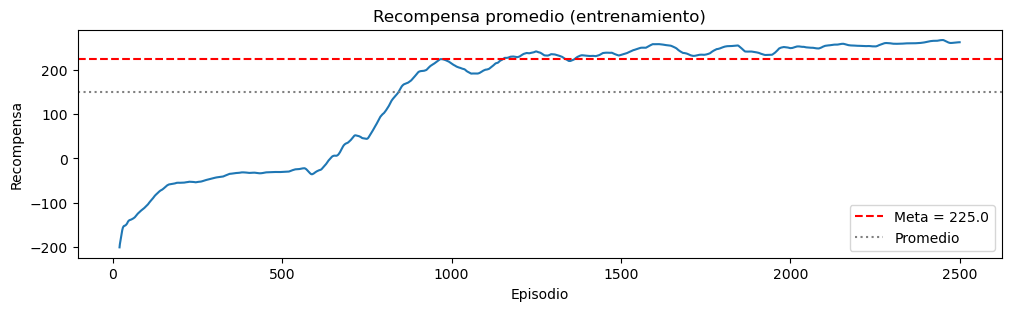

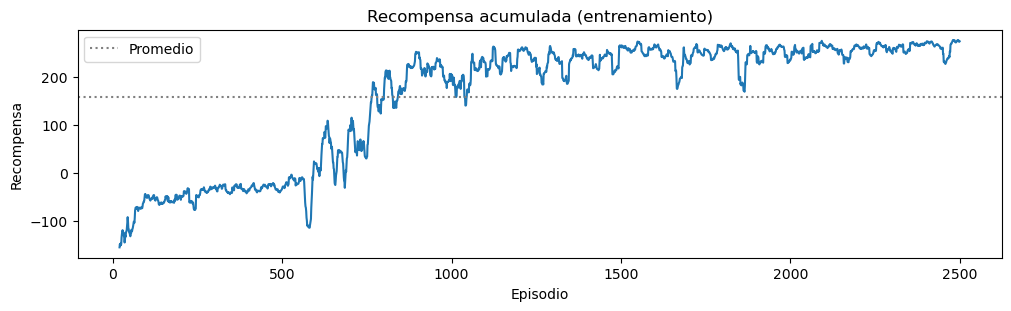

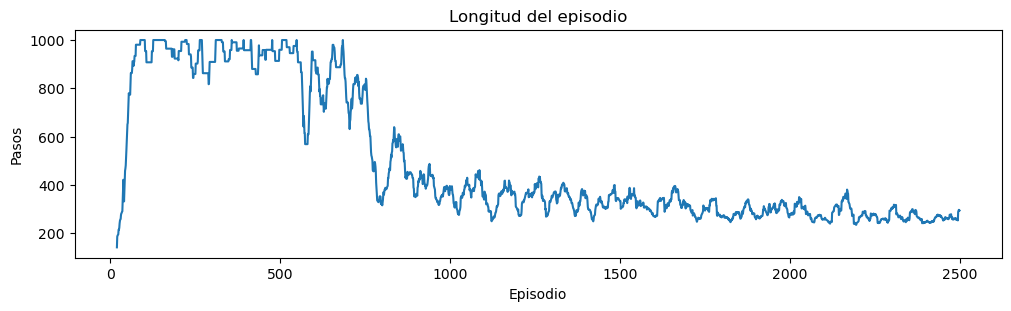

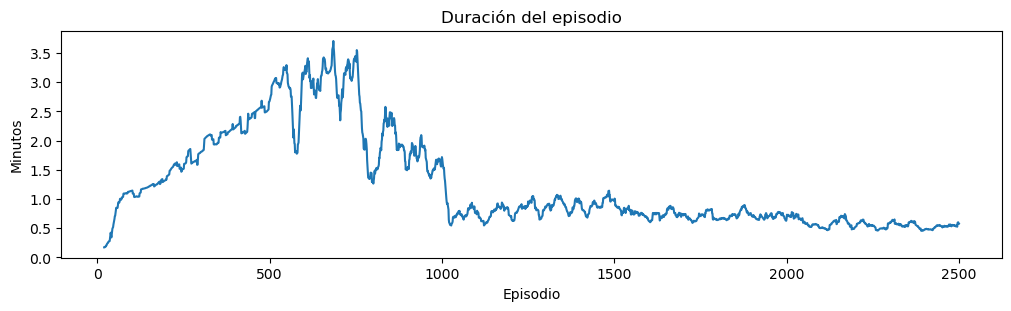

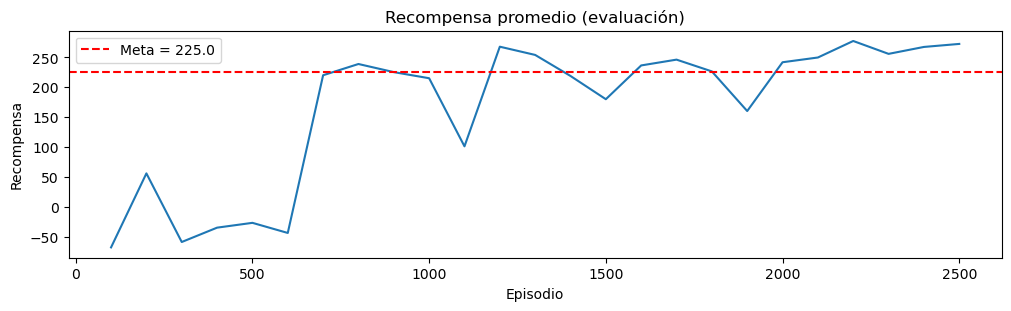

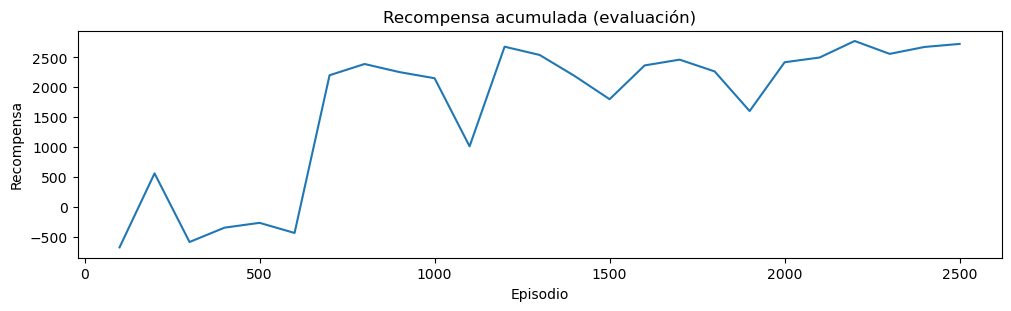

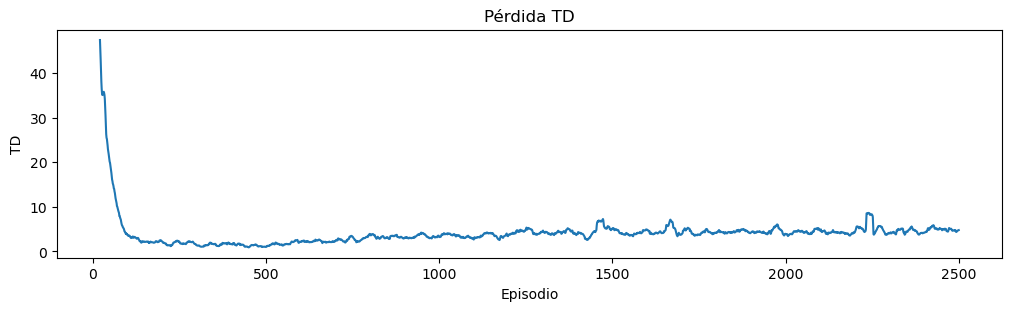

In [9]:
show_metrics(DQN_Agent, DQN_metrics)

#### 1.C. Demostración en vivo del modelo
Se requiere el archivo que contiene el modelo entrenado "rl_dqn_2500.h5" que se adjunta con este cuaderno, considere que el archivo debe encontrarse en la misma carpeta.

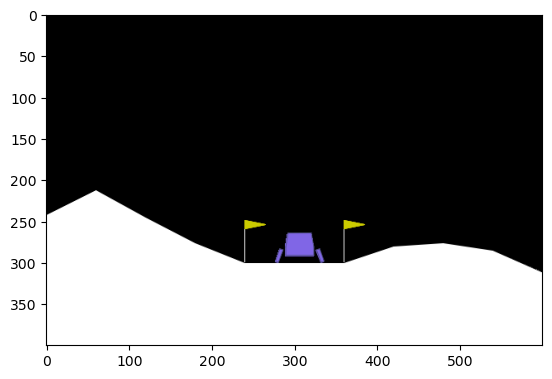

In [10]:
DQN_Agent = XQN(Method.DQN, epsilon=0.99, device=device)
DQN_Agent.load_saved_model(constants.n_episodes, constants.output_dqn_filename.format(constants.n_episodes))
live_model_demostration(DQN_Agent)

#### 1.D. Demostración en video
Se requiere el archivo de video "rl_video_dqn.h5" que se adjunta con este cuaderno, considere que el archivo debe encontrarse en la misma carpeta.

In [11]:
DQN_Agent.set_eval()

dqn_video_file = "rl_video_dqn.mp4"

if not (os.path.exists(dqn_video_file)):
    generate_MP4(DQN_Agent, dqn_video_file)

<div align="Left">
<video controls>
      <source src="./rl_video_dqn.mp4" type="video/mp4">
</video></div>

### **Algoritmo 2. Double Deep Q-Network (DDQN)**

##### **Arquitectura:** Q Learning | **Tipo:** Off-Policy | **Entornos:** Discretos | **Autor(es):** Van Hasselt et al., 2016

Double Deep Q-Network (DDQN) es una extensión del algoritmo Deep Q-Network (DQN) que aborda algunas de las limitaciones del DQN, particularmente el problema de sobreestimación de los valores Q.

<img src="rl_tarea_ddqn_algorithm.png" align="Center" style="float" width="640">

DDQN mejora sobre DQN al abordar el problema de la sobreestimación, lo que conduce a un aprendizaje más estable y preciso, y generalmente a un mejor desempeño en una variedad de entornos de aprendizaje por refuerzo.

En DQN, se actualiza la red Q utilizando la siguiente ecuación:

$$ Q(s, a) \leftarrow Q(s, a) + \alpha \left( r + \gamma \max_{a'} Q(s', a') - Q(s, a) \right) $$

El uso de la misma red para seleccionar y evaluar la acción máxima max 𝑎′ 𝑄(𝑠′,𝑎′) puede llevar a una sobreestimación sistemática de los valores Q. DDQN (Double DQN) introduce una modificación para reducir esta sobreestimación. La idea principal es separar la selección de la acción y la evaluación de la acción. Esto se logra utilizando dos redes Q diferentes: una para seleccionar la acción y otra para evaluar la acción seleccionada. La actualización de DDQN se define como:

$$ Q(s, a) \leftarrow Q(s, a) + \alpha \left( r + \gamma Q(s', \arg\max_{a'} Q(s', a'; \theta); \theta^{-}) - Q(s, a) \right) $$

Introduce una ligera complejidad adicional debido a la separación de selección y evaluación, pero el incremento en la carga computacional es mínimo y generalmente muestra un mejor rendimiento en una variedad de entornos al mitigar la sobreestimación y mejorar la estabilidad del aprendizaje.

Véase la implementación del algoritmo: **rl_lunar_lander_Q.py** 

#### 2.A. Ciclo de entrenamiento del agente

Para obtener más detalle de la implementación del ciclo de entramiento véase el archivo "rl_lunar_lander_generic.py".

In [12]:
DDQN_Agent = XQN(Method.DDQN, epsilon=0.99, device=device)
# -------------------------------------------------------------------------------------------------------------
# IMPORTANTE: El método siguiente también carga el último modelo o checkpoint almancenado.
# -------------------------------------------------------------------------------------------------------------
DDQN_metrics = run_agent_learning_cycle(agent=DDQN_Agent, out_filename=constants.output_ddqn_filename, erm_filename=constants.erm_ddqn_filename)
DDQN_Agent.set_eval()

Agente: Double Deep Q-Network (DDQN)
env:= Discrete(4)
Espacio de acciones: 4 (discreto)
Espacio de observaciones: (8,)
Meta: Recompensa Promedio > 225.0
Cargando archivo rl_ddqn_2500.pt con episodio 2500
Cargando ERM rl_ddqn_2500.erm con episodio 2500
ERM rl_ddqn_2500.erm con 1000000 ejemplos de 1000000
El agente Double Deep Q-Network (DDQN) se recargo desde el último checkpoint en el episodio 2500.
El agente Double Deep Q-Network (DDQN) se reinicia con la semilla aleatoria 1381760.
Historia:
- Episodio 100 con Duración = 0.45 minutos, Recompensa = -259.64, Longitud = 363. Recompensa Promedio = -156.58 y Longitud Promedio = 363.0
- Episodio 100 evaluado con Recompensa Promedio = -188.90185030128265
- Episodio 200 con Duración = 1.47 minutos, Recompensa = -148.5, Longitud = 1000. Recompensa Promedio = -106.68 y Longitud Promedio = 1000.0
- Episodio 200 evaluado con Recompensa Promedio = -133.64757178541626
- Episodio 300 con Duración = 1.97 minutos, Recompensa = -49.64, Longitud = 1000

#### 2.B. Despliegue de métricas y resultados

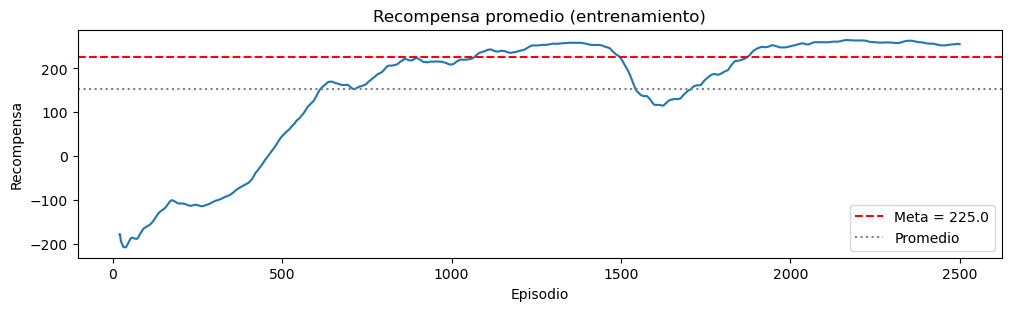

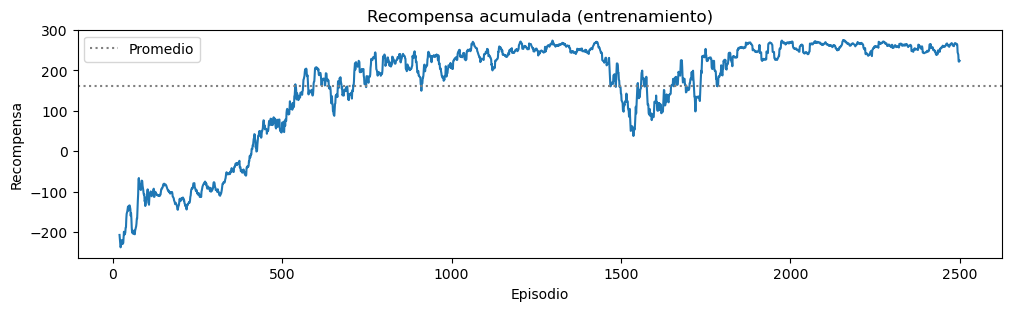

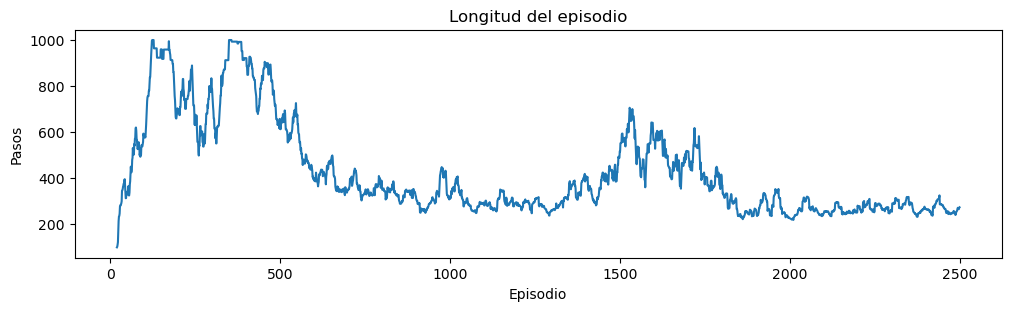

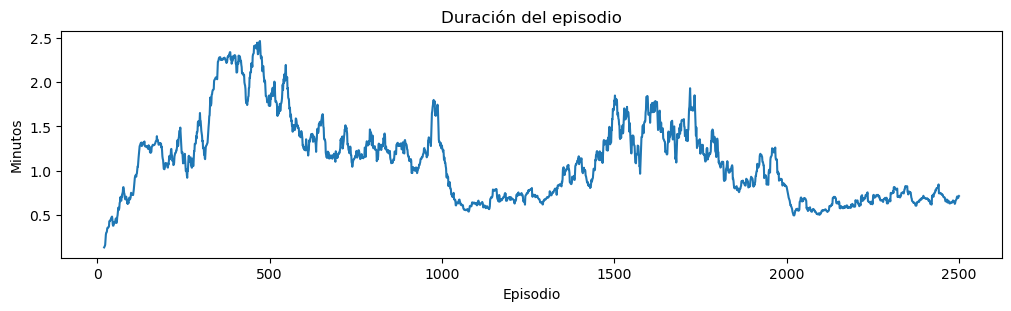

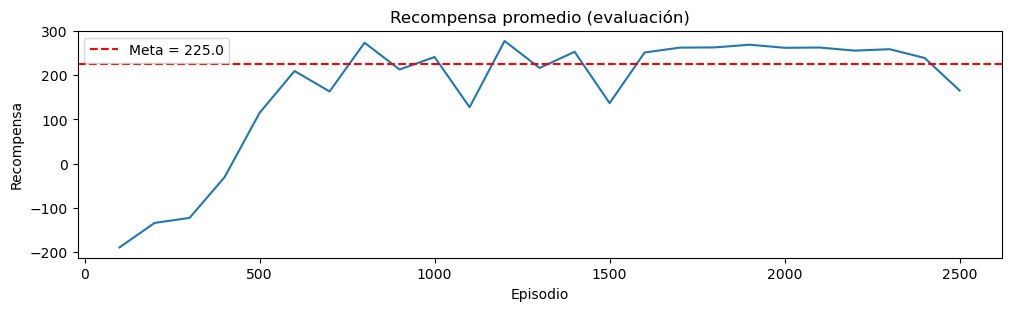

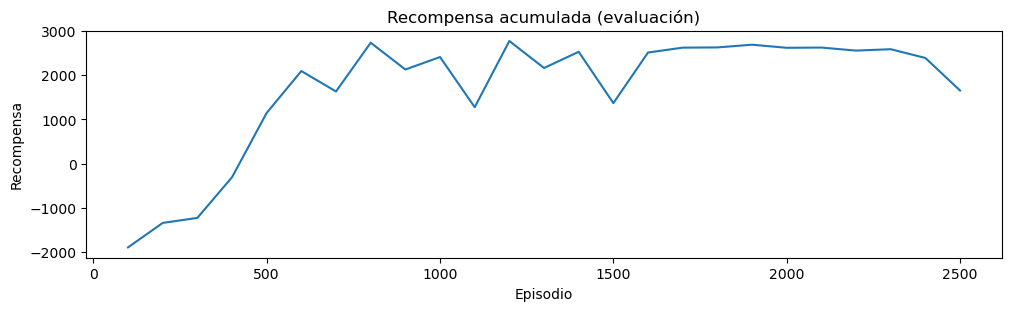

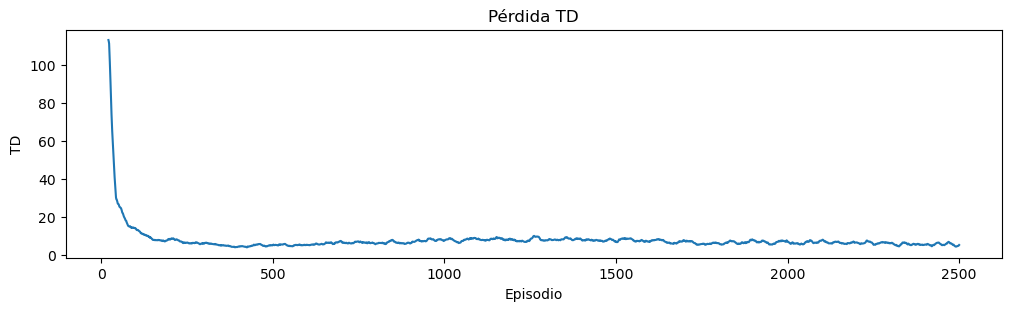

In [13]:
show_metrics(DDQN_Agent, DDQN_metrics)

#### 2.C. Demostración en vivo del modelo
Se requiere el archivo que contiene el modelo entrenado "rl_ddqn_2500.h5" que se adjunta con este cuaderno, considere que el archivo debe encontrarse en la misma carpeta.


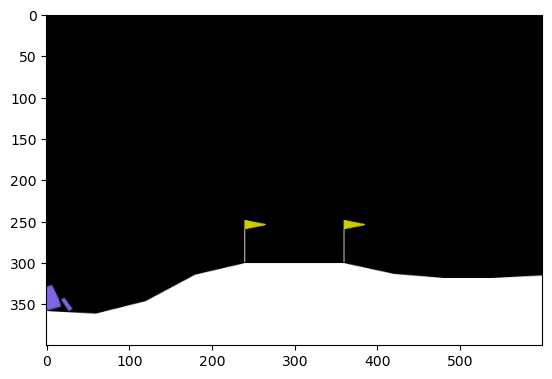

In [14]:
DDQN_Agent = XQN(Method.DDQN, epsilon=0.99, device=device)
DDQN_Agent.load_saved_model(constants.n_episodes, constants.output_ddqn_filename.format(constants.n_episodes))
live_model_demostration(DDQN_Agent)

#### 2.D. Demostración en video
Se requiere el archivo de video "rl_video_ddqn.h5" que se adjunta con este cuaderno, considere que el archivo debe encontrarse en la misma carpeta.

In [15]:
ddqn_video_file = "rl_video_ddqn.mp4"

if not (os.path.exists(ddqn_video_file)):
    generate_MP4(DDQN_Agent, ddqn_video_file)

<div align="Left">
<video controls>
      <source src="./rl_video_ddqn.mp4" type="video/mp4">
</video></div>

### **Algoritmo 3. Deep Deterministic Policy Gradients (DDPG)**

##### **Arquitectura:** Actor-Critic | **Tipo:** Off-Policy | **Entornos:** Continuos | **Autor(es):** Lillicrap et al., 2016

Deep Deterministic Policy Gradient (DDPG) es un algoritmo de aprendizaje por refuerzo que combina técnicas de aprendizaje por refuerzo basadas en políticas y en valores para resolver problemas de control continuo. DDPG es un método off-policy y se puede entender como una extensión de los métodos de Policy Gradient y Deep Q-Network (DQN).


<img src="rl_tarea_ddpg_algorithm.png" align="Center" style="float" width="640">


DDPG utiliza una arquitectura actor-critic, donde:

* Actor: Aprende una política determinista que mappea estados a acciones. El objetivo del actor es maximizar la expectativa de la suma de recompensas futuras.
* Critic: Estima el valor Q de la política actual. El objetivo del crítico es minimizar el error en la estimación del valor Q.

A diferencia de los métodos basados en políticas estocásticas, DDPG aprende una política determinista, lo que significa que para un estado dado, el actor siempre produce la misma acción.

Al igual que en DQN y DDQN, DDPG utiliza redes de target para estabilizar el entrenamiento:

* Red Actor-Target: Una copia lenta de la red actor.
* Red Critic-Target: Una copia lenta de la red critic.

DDPG utiliza un buffer de reproducción para almacenar transiciones de experiencia (𝑠,𝑎,𝑟,𝑠′). Durante el entrenamiento, se muestrea de forma aleatoria un minibatch de este buffer para actualizar las redes neuronales. Para permitir la exploración en el espacio de acciones, DDPG agrega ruido a las acciones determinadas por la política del actor. 

Comúnmente se utiliza ruido de proceso de **Ornstein-Uhlenbeck** o un proceso de ruido uniforme (como el que se utiliza en DDPG, TD3 y SAC aquí). Las redes actor y critic se actualizan mediante el descenso de gradiente. La pérdida para el critic se basa en el error de Bellman, mientras que la actualización del actor maximiza la estimación del valor Q del critic.

Véase la implementación del algoritmo: **rl_lunar_lander_ddpg.py** 

#### 3.A. Ciclo de entrenamiento del agente
Para obtener más detalle de la implementación del ciclo de entramiento véase el archivo "rl_lunar_lander_generic.py".

In [16]:
DDPG_Agent = DDPG(2, 8, 1.0, device=device)
# -------------------------------------------------------------------------------------------------------------
# IMPORTANTE: El método siguiente también carga el último modelo o checkpoint almancenado.
# -------------------------------------------------------------------------------------------------------------
DDPG_metrics = run_agent_learning_cycle(agent=DDPG_Agent, out_filename=constants.output_ddpg_filename, erm_filename=constants.erm_ddpg_filename)

Agente: Deep Deterministic Policy Gradients (DDPG)
env:= Box(-1.0, 1.0, (2,), float32)
Espacio de acciones: (2,) (continuo)
Espacio de observaciones: (8,)
Meta: Recompensa Promedio > 200.0
Cargando archivo rl_ddpg_2500.pt con episodio 2500
Cargando ERM rl_ddpg_2500.erm con episodio 2500
ERM rl_ddpg_2500.erm con 1000000 ejemplos de 1000000
El agente Deep Deterministic Policy Gradients (DDPG) se recargo desde el último checkpoint en el episodio 2500.
El agente Deep Deterministic Policy Gradients (DDPG) se reinicia con la semilla aleatoria 1518979.
Historia:
- Episodio 100 con Duración = 1.3 minutos, Recompensa = -257.21, Longitud = 227. Recompensa Promedio = -188.73 y Longitud Promedio = 227.0
- Episodio 100 evaluado con Recompensa Promedio = 10.08187934836895
- Episodio 200 con Duración = 5.85 minutos, Recompensa = -63.56, Longitud = 1000. Recompensa Promedio = -66.83 y Longitud Promedio = 1000.0
- Episodio 200 evaluado con Recompensa Promedio = -94.7820061248755
- Episodio 300 con Dura

#### 3.B. Despliegue de métricas y resultados
Se requiere el archivo que contiene el modelo entrenado "rl_ddpg_2500.h5" que se adjunta con este cuaderno, considere que el archivo debe encontrarse en la misma carpeta.

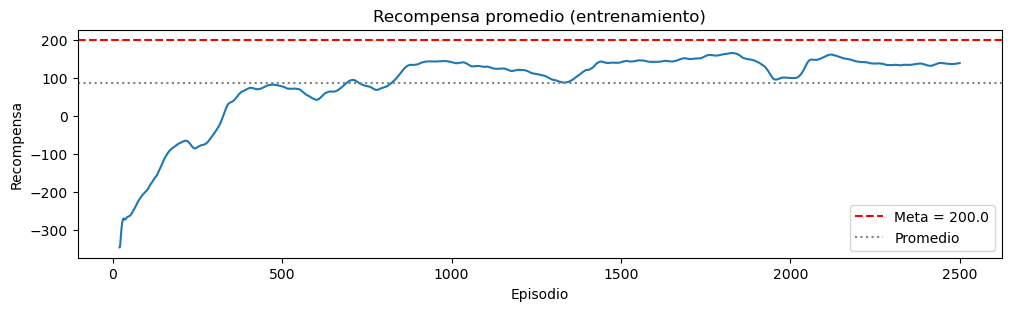

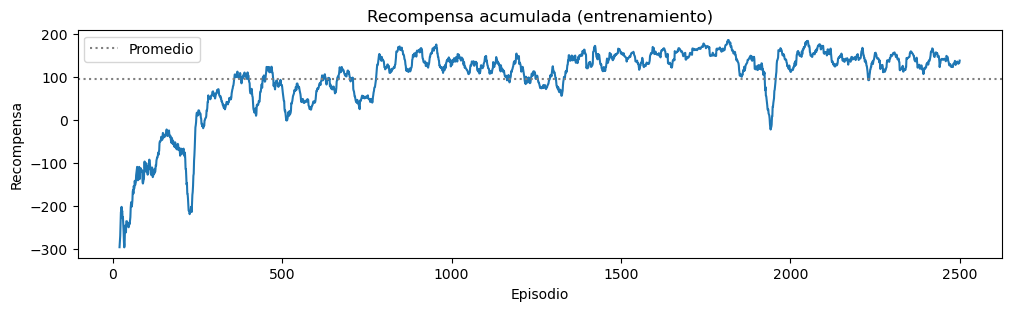

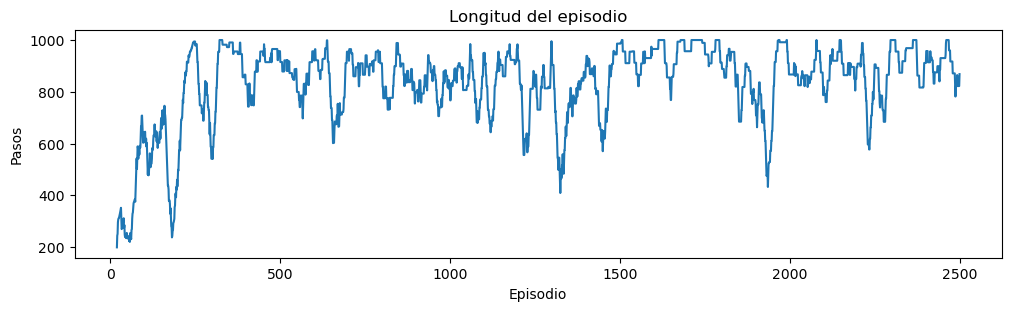

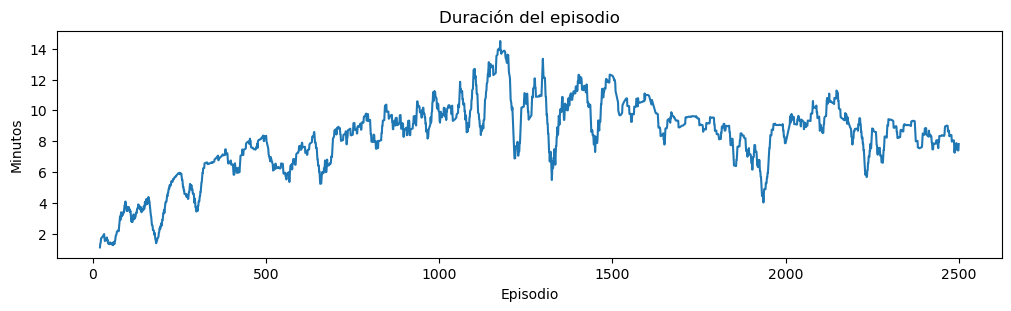

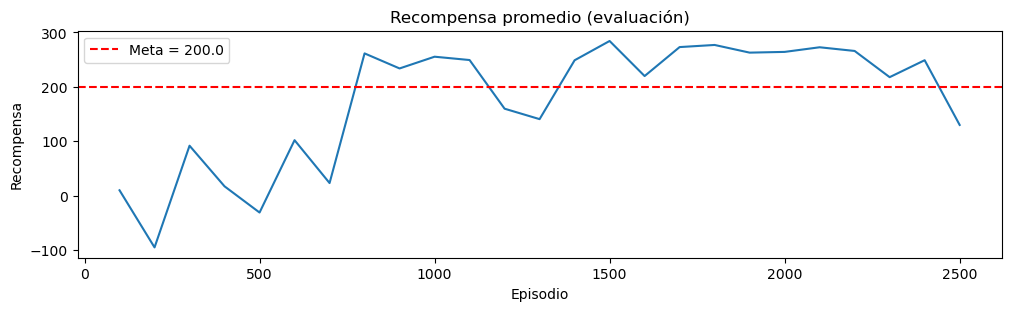

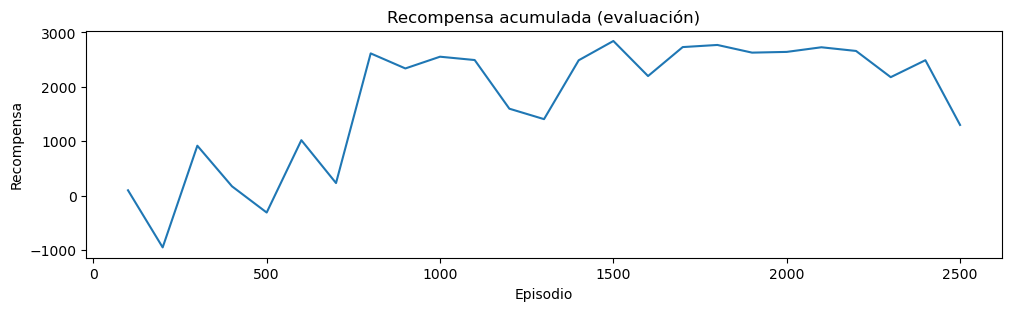

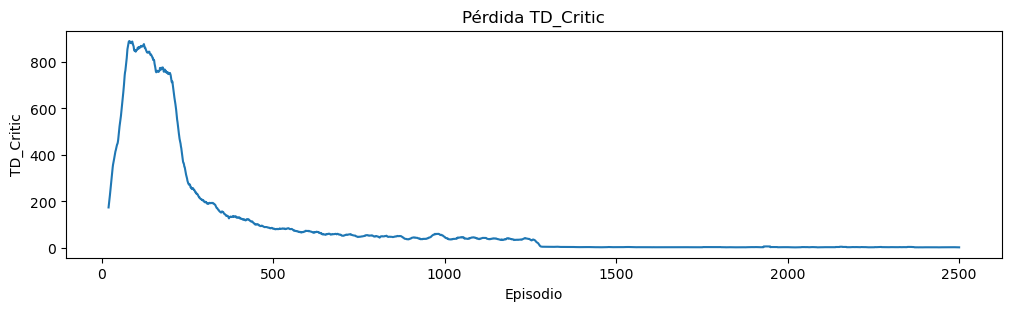

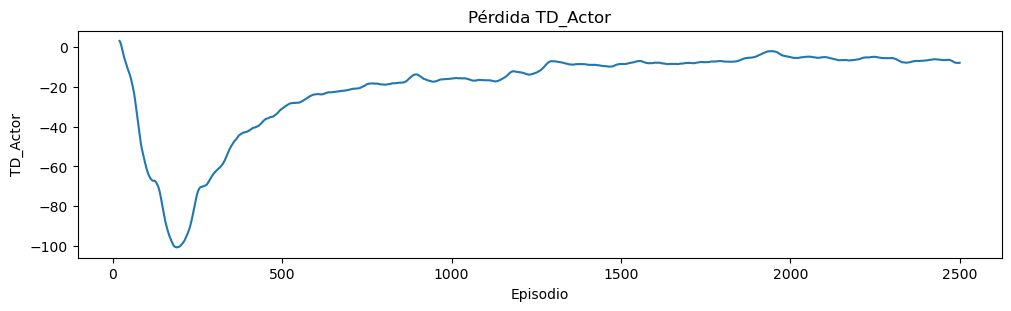

In [17]:
show_metrics(DDPG_Agent, DDPG_metrics)

#### 3.C. Demostración en vivo del modelo
Se requiere el archivo que contiene el modelo entrenado "rl_ddpg_2500.h5" que se adjunta con este cuaderno, considere que el archivo debe encontrarse en la misma carpeta.

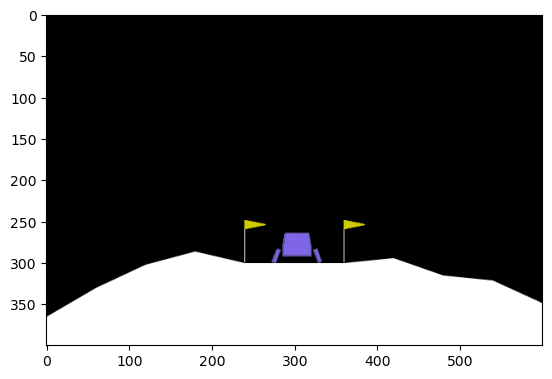

In [18]:
DDPG_Agent = DDPG(2, 8, 1.0, device=device)
DDPG_Agent.load_saved_model(constants.n_episodes, constants.output_ddpg_filename.format(constants.n_episodes))
live_model_demostration(DDPG_Agent)

#### 3.D. Demostración en video
Se requiere el archivo de video "rl_video_ddpg.h5" que se adjunta con este cuaderno, considere que el archivo debe encontrarse en la misma carpeta.


In [19]:
ddpg_video_file = "rl_video_ddpg.mp4"

if not (os.path.exists(ddpg_video_file)):
    generate_MP4(DDPG_Agent, ddpg_video_file)

<div align="Left">
<video controls>
      <source src="./rl_video_ddpg.mp4" type="video/mp4">
</video></div>

### **Algoritmo 4. Twin Delayed Deep Deterministic Policy Gradients (TD3)**

##### **Arquitectura:** Actor-Critic | **Tipo:** Off-Policy | **Entornos:** Continuos | **Autor(es):** Fujimoto et al., 2018

Twin Delayed Deep Deterministic Policy Gradient (TD3) es una mejora sobre el algoritmo Deep Deterministic Policy Gradient (DDPG) que aborda varios problemas clave para aumentar la estabilidad y el rendimiento. 

<img src="rl_tarea_td3_algorithm.png" align="Center" style="float" width="640">

TD3 introduce tres mejoras principales sobre DDPG.

* (1) TD3 reduce la sobreestimación de los valores Q utilizando dos redes críticas en lugar de una (*Twin Q Network*). Para actualizar los valores Q, se toma el valor mínimo entre los dos críticos, lo que reduce la sobreestimación. La actualización del valor Q con 𝜖 como ruido añadido a la acción para aumentar la robustez se define como:

$$
y = r + \gamma \min_{i=1,2} Q_{\theta_i'}(s', \pi_{\phi'}(s') + \epsilon)
$$

* (2) TD3 introduce actualizaciones retrasadas del actor. En lugar de actualizar las redes actor y crítico en cada paso, TD3 actualiza la red actor menos frecuentemente que la red crítico. Esto ayuda a estabilizar el entrenamiento del actor, que puede ser más sensible a las actualizaciones frecuentes.

* (3) TD3 es la adición de ruido a las acciones objetivo. Al añadir ruido a las acciones objetivo, TD3 genera actualizaciones de los valores Q más suaves y evita que el actor aprenda valores Q demasiado optimistas.

Al comparar TD3 con DDPG, se encuentran varias diferencias clave pues mientras que DDPG utiliza una sola red crítico, lo que puede llevar a sobreestimar los valores Q, TD3 utiliza dos redes críticas y toma el mínimo de los valores Q para reducir esta sobreestimación. Además, mientras DDPG actualiza las redes actor y crítico en cada paso de entrenamiento, TD3 actualiza la red actor menos frecuentemente, lo que reduce la variabilidad y mejora la estabilidad del entrenamiento. A diferencia de DDPG, que no añade ruido adicional a las acciones objetivo durante las actualizaciones de los valores Q, TD3 añade ruido a las acciones objetivo para generar actualizaciones de los valores Q más suaves y menos optimistas.

Véase la implementación del algoritmo: **rl_lunar_lander_TD3.py** 

#### 4.A. Ciclo de entrenamiento del agente

Para obtener más detalle de la implementación del ciclo de entramiento véase el archivo "rl_lunar_lander_generic.py".

In [20]:
TD3_Agent = TD3(2, 8, 1.0, device=device)
# -------------------------------------------------------------------------------------------------------------
# IMPORTANTE: El método siguiente también carga el último modelo o checkpoint almancenado.
# -------------------------------------------------------------------------------------------------------------
TD3_Metrics = run_agent_learning_cycle(agent=TD3_Agent, out_filename=constants.output_td3_filename, erm_filename=constants.erm_td3_filename)

Agente: Twin Delayed Deep Deterministic Policy Gradients (TD3)
env:= Box(-1.0, 1.0, (2,), float32)
Espacio de acciones: (2,) (continuo)
Espacio de observaciones: (8,)
Meta: Recompensa Promedio > 200.0
Cargando archivo rl_td3_2500.pt con episodio 2500
Cargando ERM rl_td3_2500.erm con episodio 2500
ERM rl_td3_2500.erm con 1000000 ejemplos de 1000000
El agente Twin Delayed Deep Deterministic Policy Gradients (TD3) se recargo desde el último checkpoint en el episodio 2500.
El agente Twin Delayed Deep Deterministic Policy Gradients (TD3) se reinicia con la semilla aleatoria 1873805.
Historia:
- Episodio 100 con Duración = 5.12 minutos, Recompensa = 12.64, Longitud = 1000. Recompensa Promedio = -153.72 y Longitud Promedio = 1000.0
- Episodio 100 evaluado con Recompensa Promedio = -190.48708639524943
- Episodio 200 con Duración = 1.53 minutos, Recompensa = 22.76, Longitud = 259. Recompensa Promedio = -47.84 y Longitud Promedio = 259.0
- Episodio 200 evaluado con Recompensa Promedio = 118.9273

#### 4.B. Despliegue de métricas y resultados

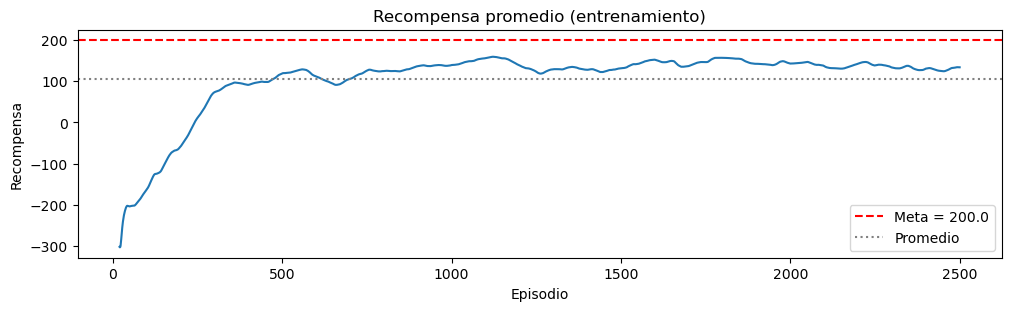

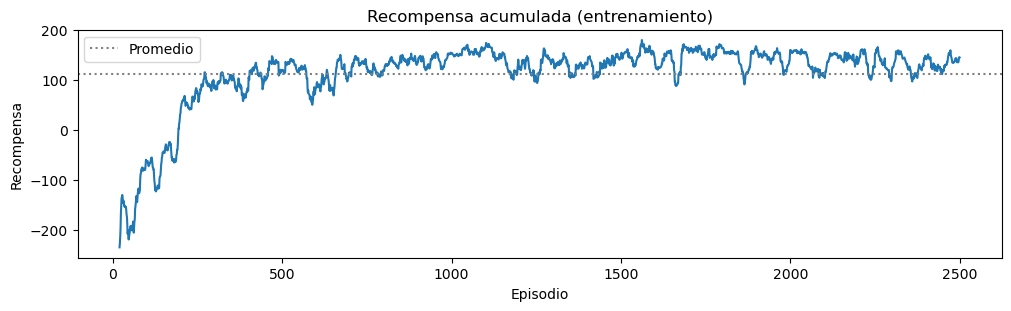

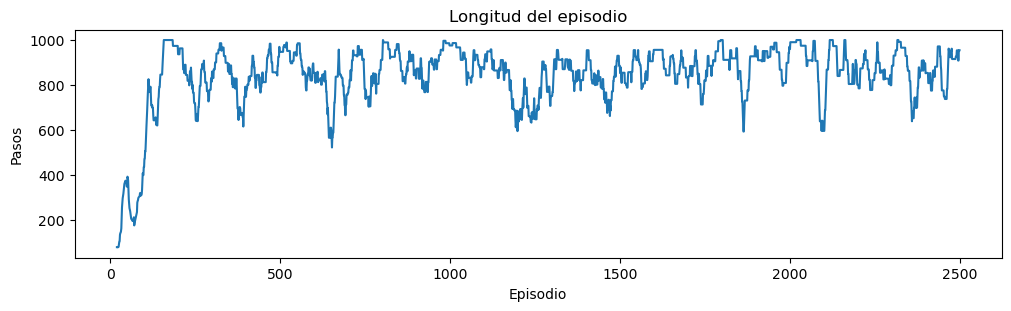

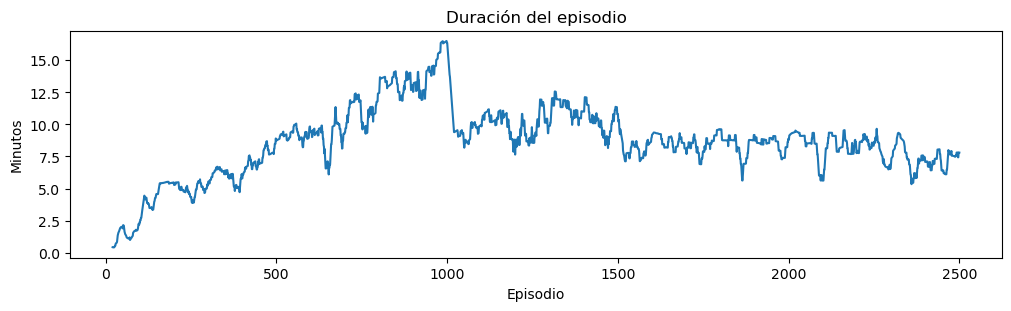

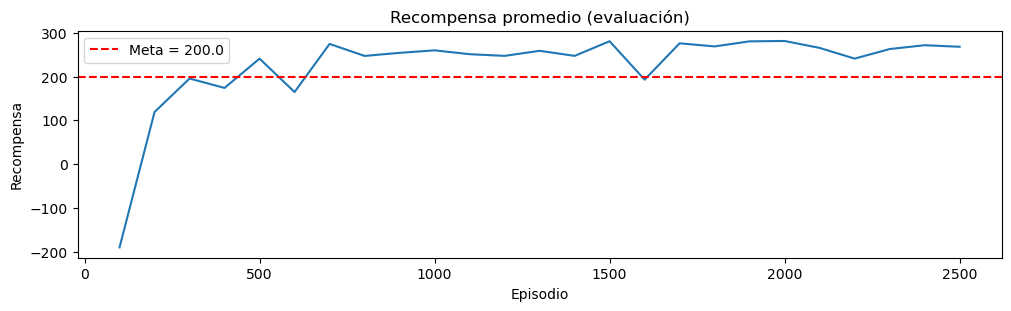

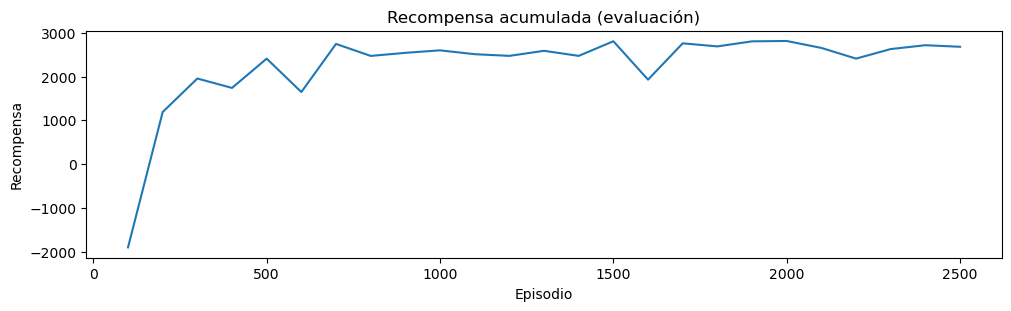

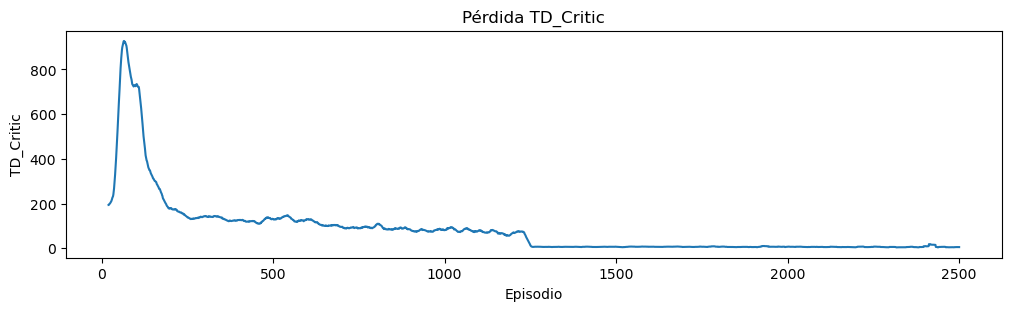

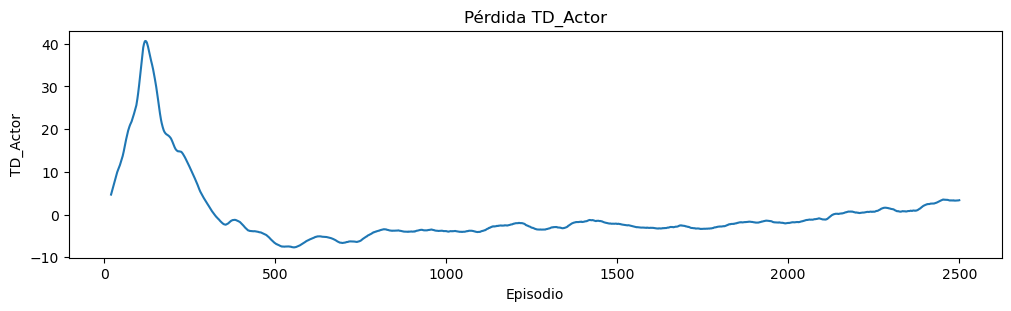

In [21]:
show_metrics(TD3_Agent, TD3_Metrics)

#### 4.C. Demostración en vivo del modelo
Se requiere el archivo que contiene el modelo entrenado "rl_td3_2500.h5" que se adjunta con este cuaderno, considere que el archivo debe encontrarse en la misma carpeta.


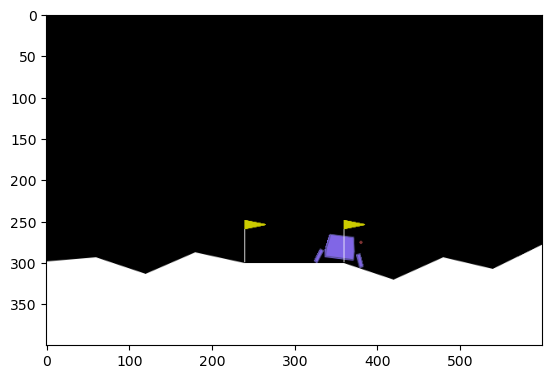

In [22]:
TD3_Agent = TD3(2, 8, 1.0, device=device)
TD3_Agent.load_saved_model(constants.n_episodes, constants.output_td3_filename.format(constants.n_episodes))
live_model_demostration(TD3_Agent)

#### 4.D. Demostración en video
Se requiere el archivo de video "rl_video_td3.h5" que se adjunta con este cuaderno, considere que el archivo debe encontrarse en la misma carpeta.

In [23]:
td3_video_file = "rl_video_td3.mp4"

if not (os.path.exists(td3_video_file)):
    generate_MP4(TD3_Agent, td3_video_file)

<div align="Left">
<video controls>
      <source src="./rl_video_td3.mp4" type="video/mp4">
</video></div>

### **5. Soft Actor Critic (SAC)**

##### **Arquitectura:** Actor-Critic | **Tipo:** Off-Policy | **Entornos:** Continuos | **Autor(es):** Haarnoja et al, 2018

Soft Actor-Critic (SAC) es un algoritmo de aprendizaje por refuerzo que se destaca por su capacidad de manejar problemas de control continuo de manera eficiente, priorizando tanto la eficiencia del muestreo como la estabilidad del aprendizaje.


<img src="rl_tarea_sac_algorithm.png" align="Center" style="float" width="640">


SAC es un algoritmo off-policy que introduce la entropía en su función de optimización. La entropía en SAC incentiva la exploración al agregar una penalización por políticas deterministas, promoviendo políticas más variadas y exploratorias. Este término de entropía ayuda a la política a explorar más eficientemente, evitando que se quede atrapada en soluciones subóptimas.

SAC utiliza una arquitectura actor-critic similar a DDPG y TD3, pero con varias diferencias clave. Utiliza dos críticos para calcular el valor Q, al igual que TD3, para reducir la sobreestimación. Además, incluye una política estocástica para el actor, lo que permite la incorporación directa de la entropía en la política.

Véase la implementación del algoritmo: **rl_lunar_lander_SAC.py** 

#### 5.A. Ciclo de entrenamiento del agente

Para obtener más detalle de la implementación del ciclo de entramiento véase el archivo "rl_lunar_lander_generic.py".

In [24]:
SAC_Agent = SAC(8, 2, device=device)
# -------------------------------------------------------------------------------------------------------------
# IMPORTANTE: El método siguiente también carga el último modelo o checkpoint almancenado.
# -------------------------------------------------------------------------------------------------------------
SAC_Metrics = run_agent_learning_cycle(agent=SAC_Agent, out_filename=constants.output_sac_filename, erm_filename=constants.erm_sac_filename)

Agente: Soft Actor-Critic (SAC)
env:= Box(-1.0, 1.0, (2,), float32)
Espacio de acciones: (2,) (continuo)
Espacio de observaciones: (8,)
Meta: Recompensa Promedio > 200.0
Cargando archivo rl_sac_2500.pt con episodio 2500
Cargando ERM rl_sac_2500.erm con episodio 2500
ERM rl_sac_2500.erm con 1000000 ejemplos de 1000000
El agente Soft Actor-Critic (SAC) se recargo desde el último checkpoint en el episodio 2500.
El agente Soft Actor-Critic (SAC) se reinicia con la semilla aleatoria 384059.
Historia:
- Episodio 100 con Duración = 4.75 minutos, Recompensa = -63.0, Longitud = 453. Recompensa Promedio = -72.83 y Longitud Promedio = 453.0
- Episodio 100 evaluado con Recompensa Promedio = -134.68028894979005
- Episodio 200 con Duración = 11.03 minutos, Recompensa = 81.39, Longitud = 1000. Recompensa Promedio = -13.52 y Longitud Promedio = 1000.0
- Episodio 200 evaluado con Recompensa Promedio = 9.226535620777092
- Episodio 300 con Duración = 12.22 minutos, Recompensa = -42.96, Longitud = 1000. R

#### 5.B. Despliegue de métricas y resultados

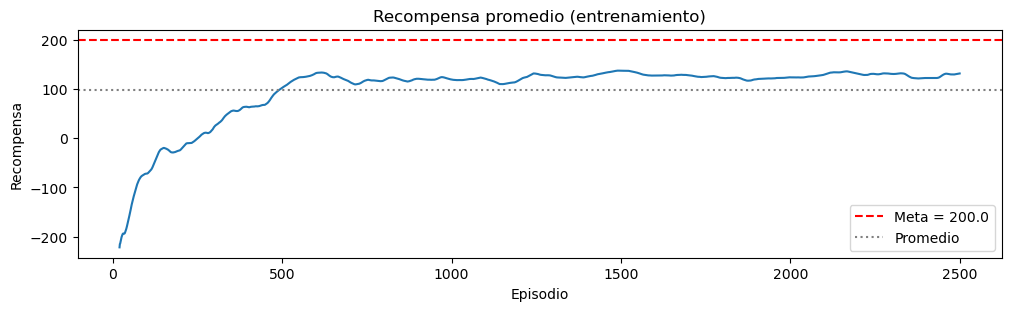

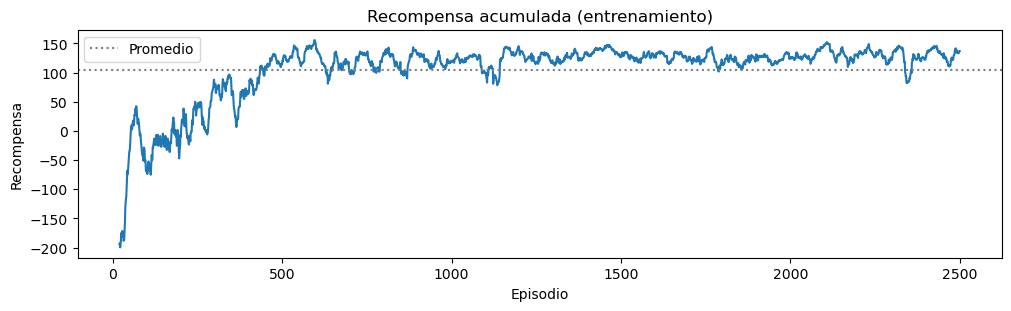

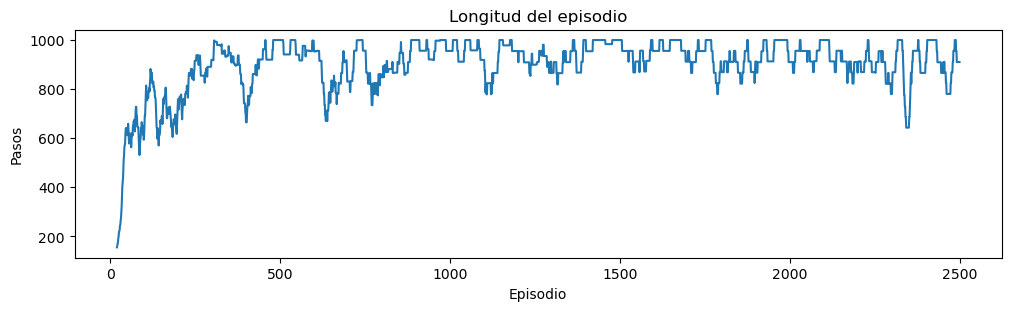

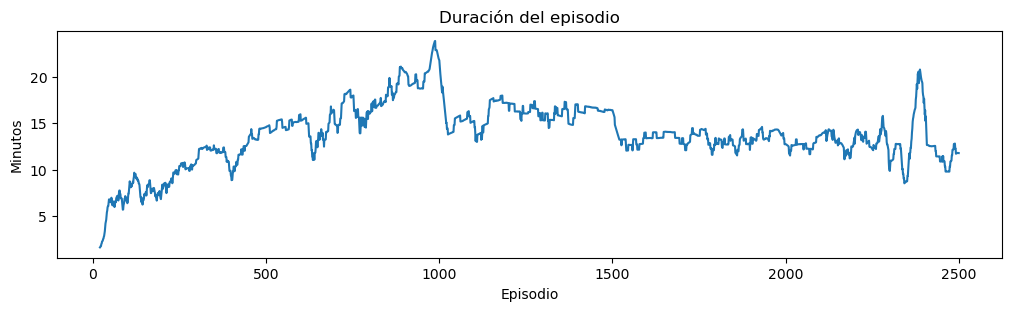

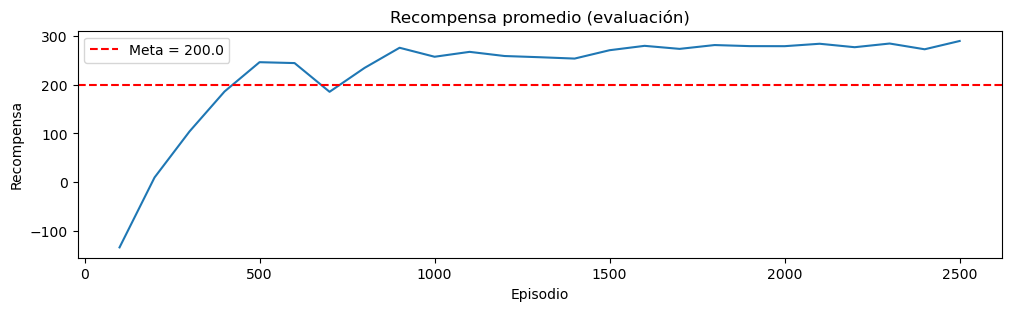

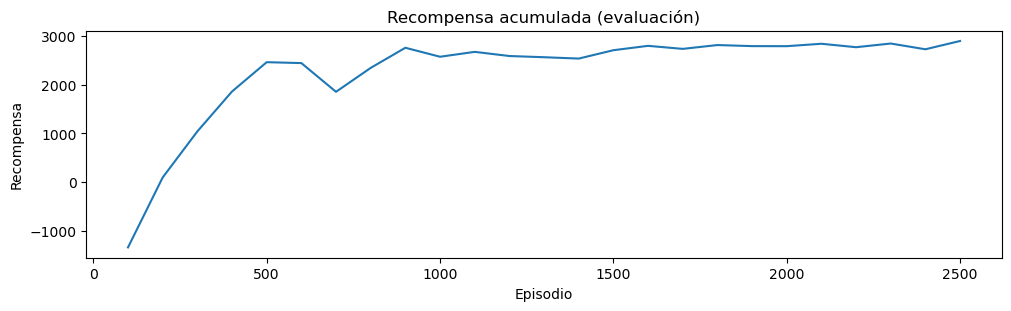

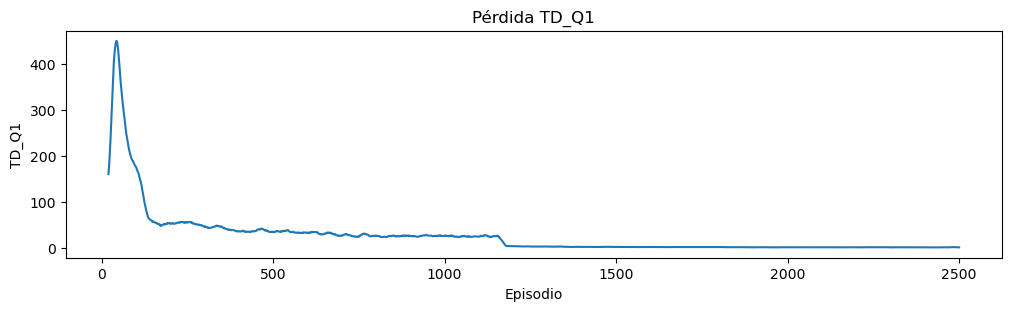

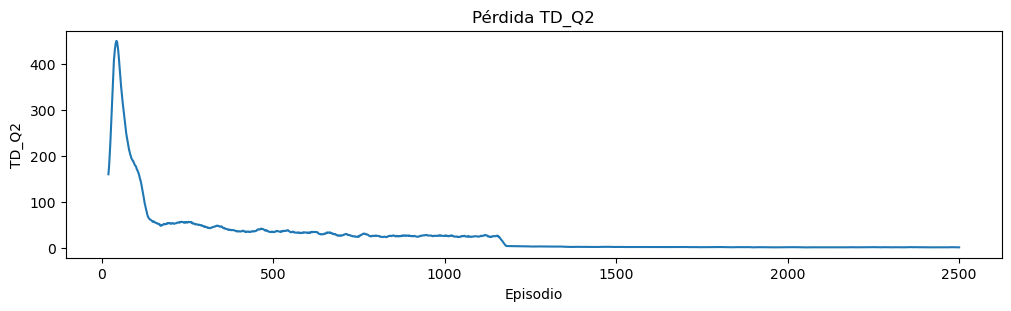

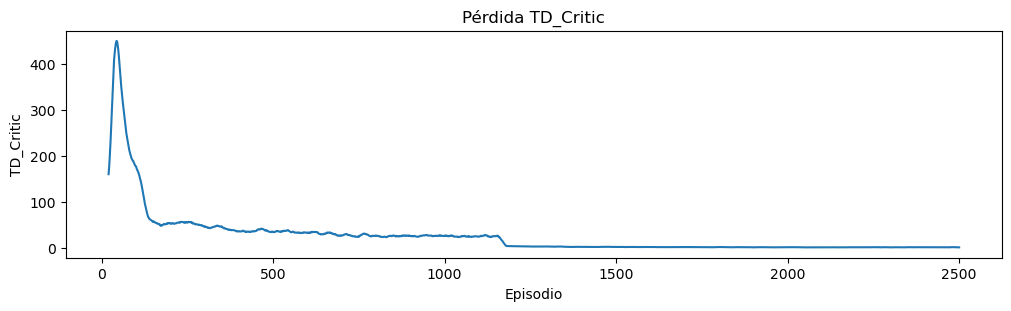

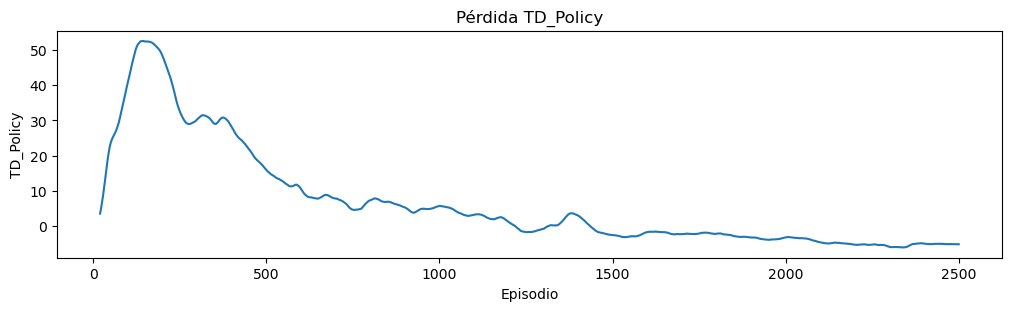

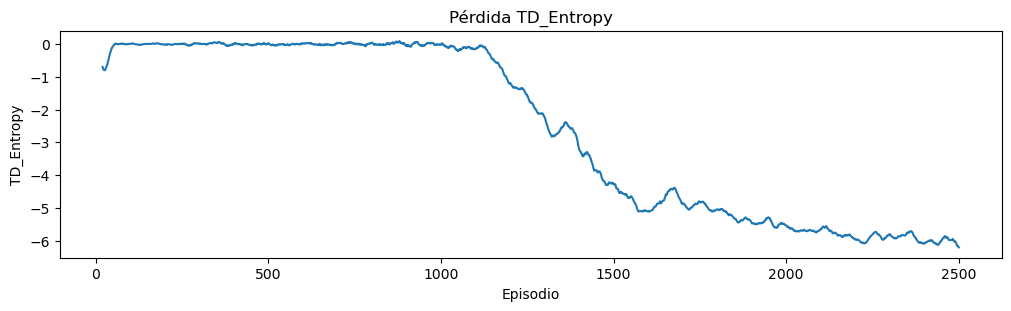

In [25]:
show_metrics(SAC_Agent, SAC_Metrics)

#### 5.C. Demostración en vivo del modelo
Se requiere el archivo que contiene el modelo entrenado "rl_sac_2500.h5" que se adjunta con este cuaderno, considere que el archivo debe encontrarse en la misma carpeta.


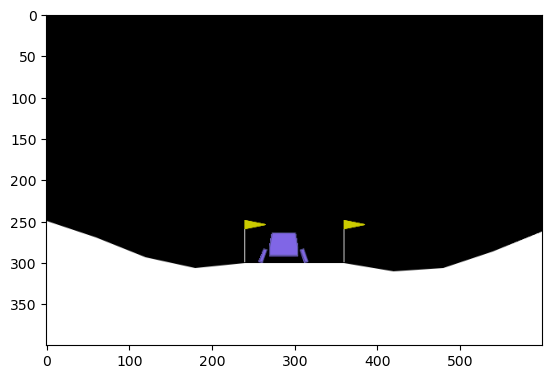

In [26]:
SAC_Agent = SAC(8, 2, device=device)
SAC_Agent.load_saved_model(constants.n_episodes, constants.output_sac_filename.format(constants.n_episodes))
live_model_demostration(SAC_Agent)

#### 5.D. Demostración en video
Se requiere el archivo de video "rl_video_sac.mp4" que se adjunta con este cuaderno, considere que el archivo debe encontrarse en la misma carpeta.

In [27]:
sac_video_file = "rl_video_sac.mp4"

if not (os.path.exists(sac_video_file)):
    generate_MP4(SAC_Agent, sac_video_file)

<div align="Left">
<video controls>
      <source src="./rl_video_sac.mp4" type="video/mp4">
</video></div>

### **Conclusiones**

Se destacan las fortalezas y las mejoras específicas que cada algoritmo aporta al campo del aprendizaje por refuerzo profundo:

* DQN introduce el concepto de Q-learning basado en redes neuronales profundas, permitiendo aprender políticas óptimas en entornos complejos.Sin embargo, sufre de sobreestimación de valores Q y puede ser lento para converger en entornos grandes.

* DDQN aborda la sobreestimación de valores Q al usar dos redes neuronales: una para seleccionar la acción y otra para evaluar su valor. Esto mejora la estabilidad del entrenamiento y la precisión en la estimación de Q-values.

* DDPG es efectivo para entornos de control continuo, utilizando un método actor-critic que optimiza políticas determinísticas. Logra estabilidad al usar un proceso de aprendizaje por experiencia y un tamaño de memoria buffer para el almacenamiento de transiciones.

* TD3 extiende DDPG al introducir dos redes Q (redes gemelas) para mitigar el problema de la sobreestimación de valores Q. Además, emplea técnicas de ruido de exploración y políticas retrasadas para mejorar la eficiencia del entrenamiento y la estabilidad.

* SAC se destaca por su capacidad para manejar tanto políticas estocásticas como determinísticas en entornos continuos. Utiliza una función de pérdida de entropía para mantener la exploración y mejorar la robustez frente a variaciones en la política.

Soft Actor-Critic (SAC) es un poderoso algoritmo para el control continuo, destacándose por su incorporación de la entropía para una mejor exploración y estabilidad. Comparado con TD3, SAC tiende a ser más eficiente en exploración y más estable debido a su enfoque en políticas estocásticas y la maximización de la entropía. En contraste, DDQN es más adecuado para problemas de control discreto y, aunque introduce mejoras sobre DQN, no es tan eficiente en entornos continuos como SAC y TD3. DDQN mejora sobre DQN al abordar el problema de la sobreestimación, lo que conduce a un aprendizaje más estable y preciso, y generalmente a un mejor desempeño en una variedad de entornos de aprendizaje por refuerzo.

### **Bibliografía revisada**

Fujimoto, S., Van Hoof, H., & Meger, D. (2018). **Addressing Function Approximation Error in Actor-Critic Methods**. 35th International Conference on Machine Learning, ICML 2018, 4. https://arxiv.org/abs/1802.09477

Gadgil, S., Xin, Y., & Xu, C. (2020). **Solving the lunar lander problem under uncertainty using reinforcement learning**. Conference Proceedings - IEEE SOUTHEASTCON, 2. https://doi.org/10.1109/SoutheastCon44009.2020.9368267

Guttulsrud, H., Sandnes, M., & Shrestha, R. (2023). **Solving the Lunar Lander Problem with Multiple Uncertainties using a Deep Q-Learning based Short-Term Memory Agent.** ACM International Conference Proceeding Series. https://doi.org/10.1145/3633637.3633641

Haarnoja, T., Zhou, A., Abbeel, P., & Levine, S. (2018a). **Soft actor-critic**. 35th International Conference on Machine Learning, ICML 2018, 5. https://arxiv.org/abs/1812.05905

Haarnoja, T., Zhou, A., Abbeel, P., & Levine, S. (2018b). **Soft Actor-Critic: Off-Policy Maximum Entropy Deep Reinforcement.** Icml 2018, 80. https://arxiv.org/abs/1801.01290

Haarnoja, T., Zhou, A., Abbeel, P., & Levine, S. (2018c). **Soft actor-critic: Off-policy maximum entropy deep reinforcement learning with a stochastic actor**. 35th International Conference on Machine Learning, ICML 2018, 5.

Huang, Y. (2020). **Playing Atari with Deep Reinforcement Learning. Deep Reinforcement Learning: Fundamentals, Research and Applications.** https://arxiv.org/abs/1312.5602

Joshi, T., Makker, S., Kodamana, H., & Kandath, H. (2021). **Twin actor twin delayed deep deterministic policy gradient (TATD3) learning for batch process control.** Computers and Chemical Engineering, 155. https://doi.org/10.1016/j.compchemeng.2021.107527

Lillicrap, T. P., Hunt, J. J., Pritzel, A., Heess, N., Erez, T., Tassa, Y., Silver, D., & Wierstra, D. (2016). **Continuous control with deep reinforcement learning.** 4th International Conference on Learning Representations, ICLR 2016 - Conference Track Proceedings. https://arxiv.org/abs/1509.02971

Liu, G., Chen, G., & Huang, V. (2023). **Policy ensemble gradient for continuous control problems in deep reinforcement learning.** Neurocomputing, 548. https://doi.org/10.1016/j.neucom.2023.126381

Mali, R., Kande, N., Mandwade, S., Nagre, V., & Sable, N. P. (2023). **Lunar Lander Using Reinforcement Learning Algorithm.** 2023 7th International Conference On Computing, Communication, Control And Automation, ICCUBEA 2023. https://doi.org/10.1109/ICCUBEA58933.2023.10392057

Matiisen, T. (2015). **Demystifying Deep Reinforcement Learning - Part 1.** Web Page, February.

Mnih, V., Kavukcuoglu, K., Silver, D., Graves, A., Antonoglou, I., Wierstra, D. & Riedmiller, M. (2013). **Playing atari with deep reinforcement learning.** arXiv preprint arXiv:1312.5602.

Nugroho, L., Rahma Zani, N., Qomariyah, N., Akmeliawati, R., Andiarti, R., & Kusuma Wijaya, S. (2021). **Powered Landing Guidance Algorithms Using Reinforcement Learning Methods for Lunar Lander Case.** In Jurnal Teknologi Dirgantara (Vol. 19, Issue 1). DOI:10.30536/j.jtd.2021.v19.a3573

Sudharsan Ravichandiran. (2020). **Deep Reinforcement Learning with Python - Second Edition.** In Book (Vol. 2, Issue 9781839210686).
Van Hasselt, H., Guez, A., & Silver, D. (2016). Deep reinforcement learning with double Q-Learning. 30th AAAI Conference on Artificial Intelligence, AAAI 2016. https://doi.org/10.1609/aaai.v30i1.10295
 
Van Hasselt, H., Guez, A., & Silver, D. (2016). **Deep reinforcement learning with double Q-Learning.** 30th AAAI Conference on Artificial Intelligence, AAAI 2016. https://doi.org/10.1609/aaai.v30i1.10295